# Digit Recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Reading the Data

In [2]:
df = pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=df.drop('label',axis=1)
y=df['label']

In [43]:
print(X.values)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
print(y.unique())

[1 0 4 7 3 5 8 9 2 6]


In [6]:
X.shape, y.shape

((42000, 784), (42000,))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

### Rescaling The Dataset




In [9]:
X_train=X_train/255.0
X_test=X_test/255.0

In [11]:
X_train.shape, y_train.shape

((29400, 784), (29400,))

### Model Creation

In [12]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(264,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='Softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 264)               207240    
                                                                 
 dense_1 (Dense)             (None, 128)               33920     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=64,epochs=20)

Epoch 1/20
460/460 [==============================] - 3s 4ms/step - loss: 0.4695 - accuracy: 0.8609
Epoch 2/20
460/460 [==============================] - 2s 4ms/step - loss: 0.1355 - accuracy: 0.9598
Epoch 3/20
460/460 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.9734
Epoch 4/20
460/460 [==============================] - 2s 4ms/step - loss: 0.0605 - accuracy: 0.9807
Epoch 5/20
460/460 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 6/20
460/460 [==============================] - 2s 5ms/step - loss: 0.0390 - accuracy: 0.9879
Epoch 7/20
460/460 [==============================] - 2s 4ms/step - loss: 0.0338 - accuracy: 0.9884
Epoch 8/20
460/460 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 9/20
460/460 [==============================] - 2s 3ms/step - loss: 0.0285 - accuracy: 0.9907
Epoch 10/20
460/460 [==============================] - 2s 3ms/step - loss: 0.0219 - accuracy: 0.9933

In [14]:
X_test.shape

(12600, 784)

In [15]:
X_test=X_test.to_numpy()
X_test=X_test.reshape(-1,28,28)

### Checking The Model Performance

394/394 [==============================] - 1s 1ms/step


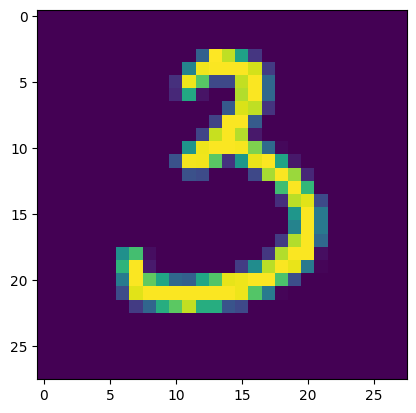

Recognized Digit: 3


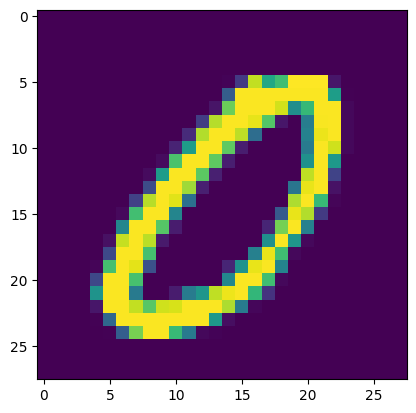

Recognized Digit: 0


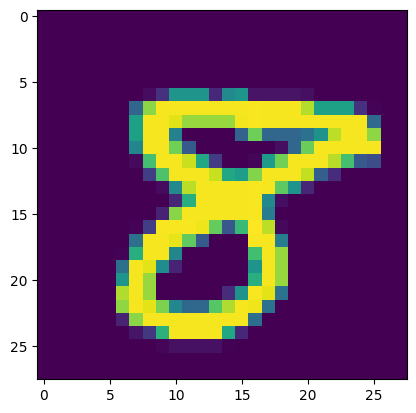

Recognized Digit: 8


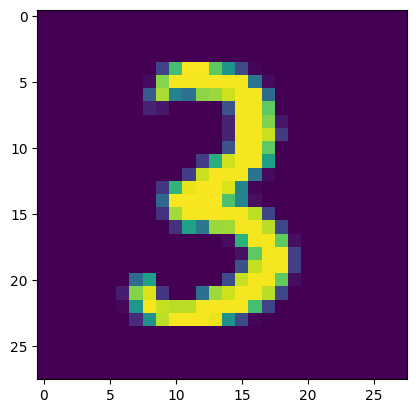

Recognized Digit: 3


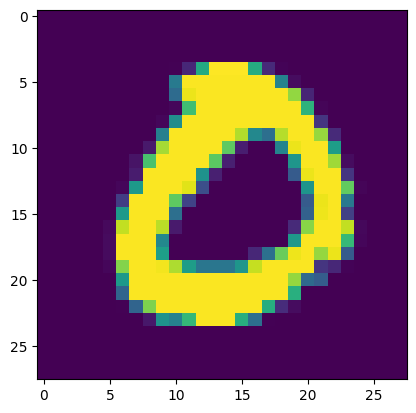

Recognized Digit: 0


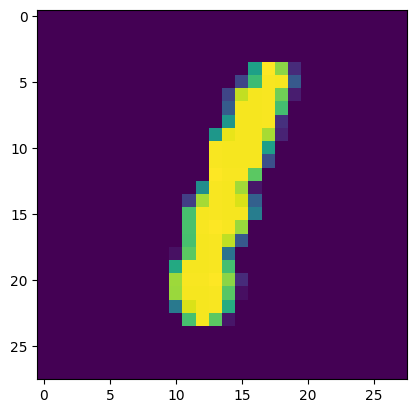

Recognized Digit: 1


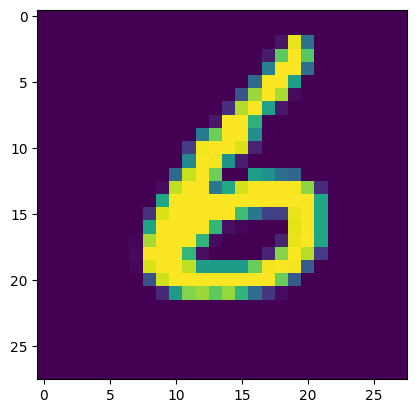

Recognized Digit: 6


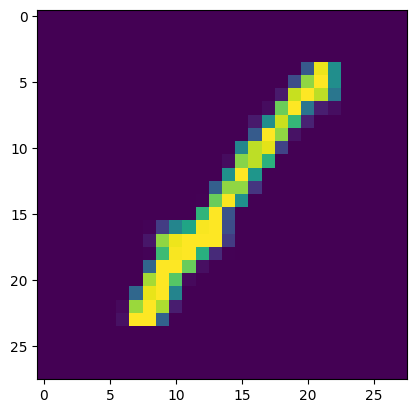

Recognized Digit: 1


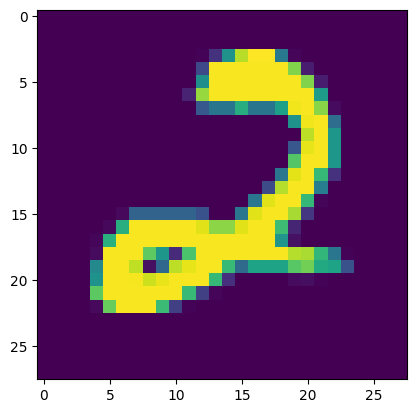

Recognized Digit: 2


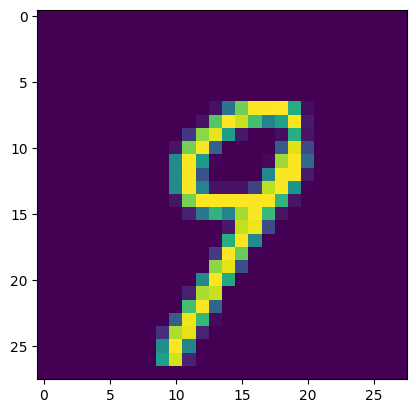

Recognized Digit: 9


In [17]:
y_pred=model.predict(X_test).round().astype(int)
for i in range(10):
    plt.imshow(X_test[i])
    plt.show()
    print("Recognized Digit:",np.argmax(y_pred[i]))

In [18]:
print(y_test.shape)
print(y_pred.shape)
y_pred= np.argmax(y_pred, axis=1)
print(y_pred.shape)

(12600,)
(12600, 10)
(12600,)


In [20]:
model.evaluate(X_test, y_test)

394/394 [==============================] - 1s 3ms/step - loss: 0.1545 - accuracy: 0.9717


[0.15449416637420654, 0.971746027469635]

**Accuracy** : 97.17%

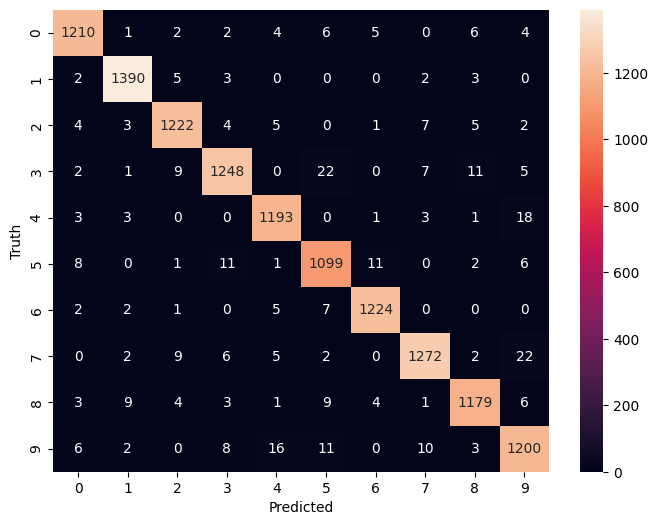

In [25]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()